# The data

The dataset athlete_events.csv contains 271’116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event. Can you predict who will win?

The features:

ID - Unique number for each athlete     
Name - Athlete’s name       
Sex - M or F        
Age - Integer       
Height - In centimeters     
Weight - In kilograms       
Team - Team name        
NOC - National Olympic Committee 3-letter code      
Games - Year and season     
Year - Integer      
Season - Summer or Winter       
City - Host city        
Sport - Sport       
Event - Event       
Medal - Gold, Silver, Bronze, or NA     

# Import dependencies

In [ ]:
import pandas as pd
import seaborn as sns

# Import data and exploratory data analysis

In [2]:
df = pd.read_csv("../data/athlete_events.csv")

In [3]:
print(df.shape)
df.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


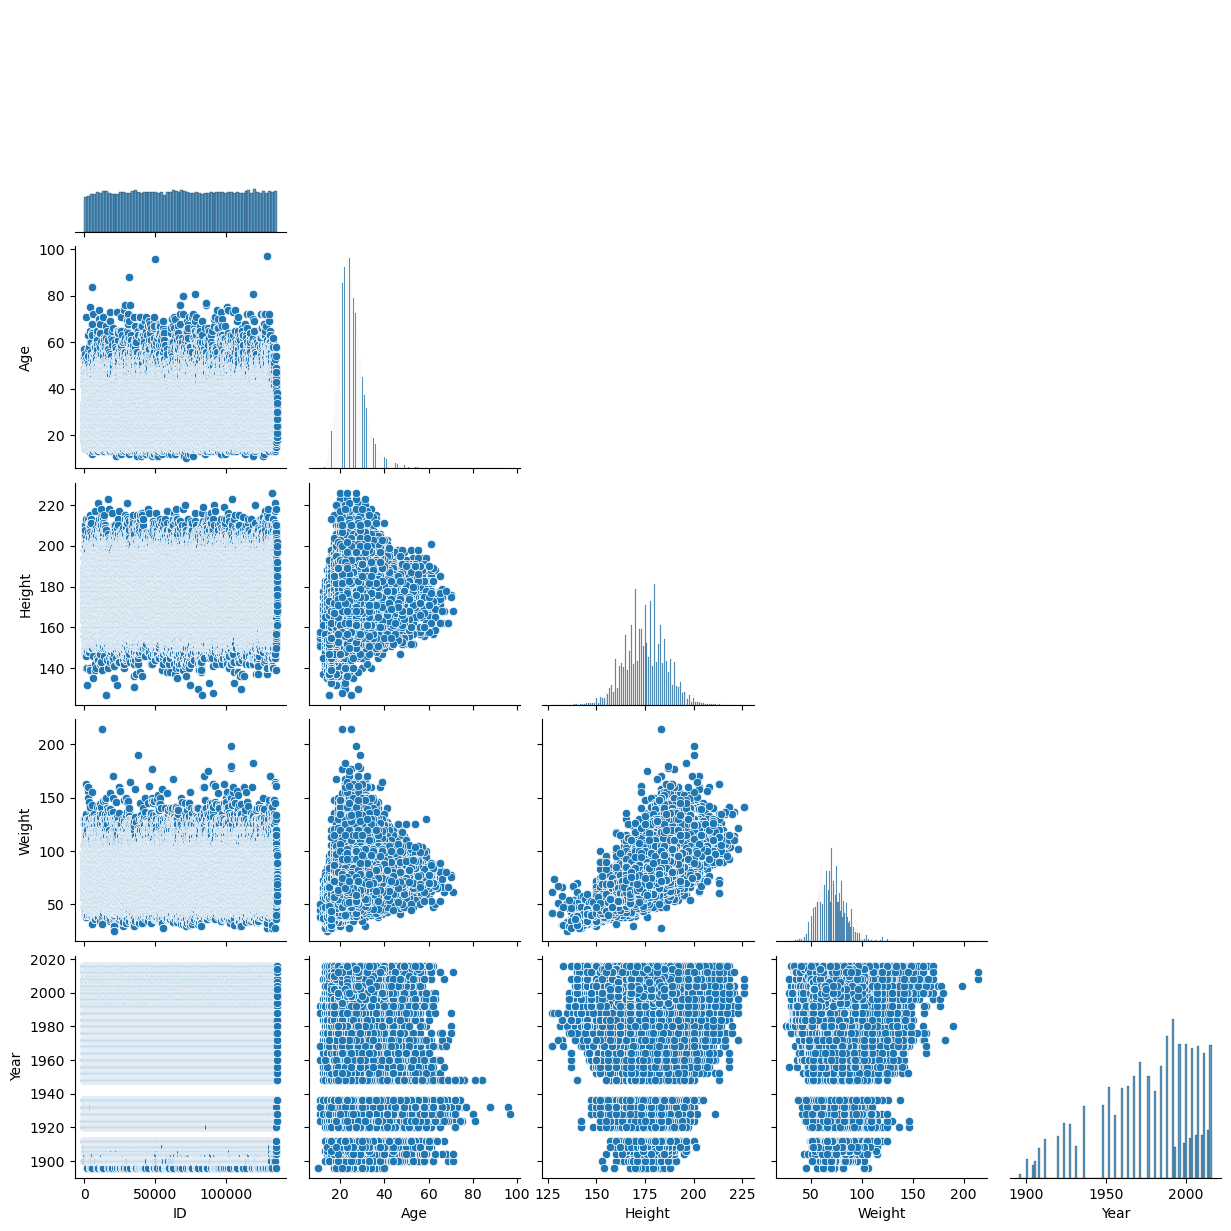

In [6]:
sns.pairplot(df, corner=True);

In [7]:
df.shape

(271116, 15)

### ID and Name

In [8]:
df["ID"].nunique()

135571

In [9]:
df["Name"].nunique()

134732

In [10]:
df["ID"].describe()

count    271116.000000
mean      68248.954396
std       39022.286345
min           1.000000
25%       34643.000000
50%       68205.000000
75%      102097.250000
max      135571.000000
Name: ID, dtype: float64

&rarr; it's interesting that there are less IDs than the number of entries. Also, that the number of unique IDs is not the same as the number of unique names.      
I don't see how the ID information is valuable for the prediction, so I will just drop it

In [11]:
df = df.drop(columns=["ID"])

In [12]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Games, Year and Season

In [13]:
df["Games"].unique()

array(['1992 Summer', '2012 Summer', '1920 Summer', '1900 Summer',
       '1988 Winter', '1992 Winter', '1994 Winter', '1932 Summer',
       '2002 Winter', '1952 Summer', '1980 Winter', '2000 Summer',
       '1996 Summer', '1912 Summer', '1924 Summer', '2014 Winter',
       '1948 Summer', '1998 Winter', '2006 Winter', '2008 Summer',
       '2016 Summer', '2004 Summer', '1960 Winter', '1964 Winter',
       '1984 Winter', '1984 Summer', '1968 Summer', '1972 Summer',
       '1988 Summer', '1936 Summer', '1952 Winter', '1956 Winter',
       '1956 Summer', '1960 Summer', '1928 Summer', '1976 Summer',
       '1980 Summer', '1964 Summer', '2010 Winter', '1968 Winter',
       '1906 Summer', '1972 Winter', '1976 Winter', '1924 Winter',
       '1904 Summer', '1928 Winter', '1908 Summer', '1948 Winter',
       '1932 Winter', '1936 Winter', '1896 Summer'], dtype=object)

In [14]:
df["Year"].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

In [15]:
df["Season"].unique()

array(['Summer', 'Winter'], dtype=object)

&rarr; will drop games because it has redundant information

In [16]:
df = df.drop(columns=["Games"])

In [17]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Team and NOC

In [18]:
print(len(df["Team"].unique()))
print(list(df["Team"].unique()))

1184
['China', 'Denmark', 'Denmark/Sweden', 'Netherlands', 'United States', 'Finland', 'Norway', 'Romania', 'Estonia', 'France', 'Taifun', 'Morocco', 'Spain', 'Egypt', 'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey', 'Chile', 'Mexico', 'Soviet Union', 'Nicaragua', 'Hungary', 'Nigeria', 'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'United Arab Republic', 'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Thessalonki-1', 'Canada', 'Ireland', 'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan', 'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros', 'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Syria', 'Maldives', 'Ethiopia', 'United Arab Emirates', 'North Yemen', 'Indonesia', 'Philippines', 'Singapore', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Unified Team', 'Japan', 'Japan-1', 'Congo (Brazzaville)', 'Switzerland', 'Brazil', 'West Germany', 'East Germany', 'Monaco', 'Fornebo', '

In [19]:
print(len(df["NOC"].unique()))
df["NOC"].unique()

230


array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

&rarr; going to drop Team, NOC seems to have enough information, even though Team is more granular

In [20]:
df = df.drop(columns=["Team"])

In [21]:
df.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Sport and Event

In [22]:
print(len(df["Sport"].unique()))
df["Sport"].unique()

66


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [23]:
print(len(df["Event"].unique()))
df["Event"].unique()

765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

&rarr; going to keep both of these two

### City

In [24]:
df["City"].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

&rarr; will leave this, in the possibility that it might bring an advantage if you're playing in your country and have a relevance for the prediction

### Adding a column with the number of participations of each individual

&rarr; could be relevant for experience level or aging

In [25]:
df["Times_Participated"] = df.groupby("Name")["Year"].transform("nunique")

In [26]:
df.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Times_Participated
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,1
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,3


In [27]:
df["Participation_Number"] = (
    df.groupby("Name")["Year"]
          .transform(lambda x: x.rank(method="dense").astype(int))
)

In [28]:
df.head()

,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Times_Participated,Participation_Number
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1,1
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1,1
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,1,1
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,3,1


### NAs

#### Overview of NAs

In [29]:
df.isna().sum()

Name                         0
Sex                          0
Age                       9474
Height                   60171
Weight                   62875
NOC                          0
Year                         0
Season                       0
City                         0
Sport                        0
Event                        0
Medal                   231333
Times_Participated           0
Participation_Number         0
dtype: int64

&rarr; Age, Height and Weight, Medal have NAs, will need imputation 

#### NAs Medal

My strategy for imputing Medal NAs &rar; will just replace with "no medal"

In [30]:
df["Medal"].isna().sum()

231333

In [31]:
df["Medal"] = df["Medal"].fillna("no medal")

In [32]:
df["Medal"].isna().sum()

0

In [33]:
df["Medal"].unique()

array(['no medal', 'Gold', 'Bronze', 'Silver'], dtype=object)

#### Splitting dataframe into summer men, summer women, winter men and winter women before handling NAs

In [34]:
print(df["Sex"].unique())
print(df["Season"].unique())

['M' 'F']
['Summer' 'Winter']


In [35]:
summer_men = df[(df["Sex"] == "M") & (df["Season"] == "Summer")]
print(summer_men.shape)

(163109, 14)


In [36]:
summer_men = summer_men.drop(columns=["Sex", "Season"])
summer_men.columns

Index(['Name', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'City', 'Sport',
       'Event', 'Medal', 'Times_Participated', 'Participation_Number'],
      dtype='object')

In [37]:
summer_women = df[(df["Sex"] == "F") & (df["Season"] == "Summer")]
print(summer_women.shape)

(59443, 14)


In [38]:
summer_women = summer_women.drop(columns=["Sex", "Season"])
summer_women.columns

Index(['Name', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'City', 'Sport',
       'Event', 'Medal', 'Times_Participated', 'Participation_Number'],
      dtype='object')

In [39]:
winter_men = df[(df["Sex"] == "M") & (df["Season"] == "Winter")]
print(winter_men.shape)

(33485, 14)


In [40]:
winter_men = winter_men.drop(columns=["Sex", "Season"])
winter_men.columns

Index(['Name', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'City', 'Sport',
       'Event', 'Medal', 'Times_Participated', 'Participation_Number'],
      dtype='object')

In [41]:
winter_women = df[(df["Sex"] == "F") & (df["Season"] == "Winter")]
print(winter_women.shape)

(15079, 14)


In [42]:
winter_women = winter_women.drop(columns=["Sex", "Season"])
winter_women.columns

Index(['Name', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'City', 'Sport',
       'Event', 'Medal', 'Times_Participated', 'Participation_Number'],
      dtype='object')

#### NAs age, weight and height

My strategy for imputing age, height and weight 
1. will try to replace my mean age/weight/height of the participants in the event, if still NAs, then
2. will try to replace my mean age/weight/height of the participants in the sport, if still NAs, then
3. will replace with the mean age/weight/height     


Will do this in each separate dataframe (summer men, summer women, winter men, winter women) in order to have better approximations

##### NAs summer men

In [43]:
summer_men.isna().sum()

Name                        0
Age                      8772
Height                  46270
Weight                  47849
NOC                         0
Year                        0
City                        0
Sport                       0
Event                       0
Medal                       0
Times_Participated          0
Participation_Number        0
dtype: int64

In [44]:
# Age
print(summer_men["Age"].isna().sum())
if summer_men["Age"].isna().sum() >0:
    summer_men["Age"] = summer_men.groupby("Event")["Age"].transform(lambda x: x.fillna(x.mean()))
    print(summer_men["Age"].isna().sum())
    if summer_men["Age"].isna().sum() >0:
        summer_men["Age"] = summer_men.groupby("Sport")["Age"].transform(lambda x: x.fillna(x.mean()))
        print(summer_men["Age"].isna().sum())
        if summer_men["Age"].isna().sum() >0:
            summer_men['Age'] = summer_men['Age'].fillna(summer_men['Age'].mean())
print(summer_men["Age"].isna().sum())

8772
142
0
0


In [45]:
# Weight
print(summer_men["Weight"].isna().sum())
if summer_men["Weight"].isna().sum() >0:
    summer_men["Weight"] = summer_men.groupby("Event")["Weight"].transform(lambda x: x.fillna(x.mean()))
    print(summer_men["Weight"].isna().sum())
    if summer_men["Weight"].isna().sum() >0:
        summer_men["Weight"] = summer_men.groupby("Sport")["Weight"].transform(lambda x: x.fillna(x.mean()))
        print(summer_men["Weight"].isna().sum())
        if summer_men["Weight"].isna().sum() >0:
            summer_men['Weight'] = summer_men['Weight'].fillna(summer_men['Weight'].mean())
print(summer_men["Weight"].isna().sum())

47849
4434
165
0


In [46]:
# Height
print(summer_men["Height"].isna().sum())
if summer_men["Height"].isna().sum() >0:
    summer_men["Height"] = summer_men.groupby("Event")["Height"].transform(lambda x: x.fillna(x.mean()))
    print(summer_men["Height"].isna().sum())
    if summer_men["Height"].isna().sum() >0:
        summer_men["Height"] = summer_men.groupby("Sport")["Height"].transform(lambda x: x.fillna(x.mean()))
        print(summer_men["Height"].isna().sum())
        if summer_men["Height"].isna().sum() >0:
            summer_men['Height'] = summer_men['Height'].fillna(summer_men['Height'].mean())
print(summer_men["Height"].isna().sum())

46270
1900
47
0


##### NAs summer women

In [47]:
summer_women.isna().sum()

Name                       0
Age                      417
Height                  5587
Weight                  6005
NOC                        0
Year                       0
City                       0
Sport                      0
Event                      0
Medal                      0
Times_Participated         0
Participation_Number       0
dtype: int64

In [48]:
# Age
print(summer_women["Age"].isna().sum())
if summer_women["Age"].isna().sum() >0:
    summer_women["Age"] = summer_women.groupby("Event")["Age"].transform(lambda x: x.fillna(x.mean()))
    print(summer_women["Age"].isna().sum())
    if summer_women["Age"].isna().sum() >0:
        summer_women["Age"] = summer_women.groupby("Sport")["Age"].transform(lambda x: x.fillna(x.mean()))
        print(summer_women["Age"].isna().sum())
        if summer_women["Age"].isna().sum() >0:
            summer_women['Age'] = summer_women['Age'].fillna(summer_women['Age'].mean())
print(summer_women["Age"].isna().sum())

417
2
0
0


In [49]:
# Weight
print(summer_women["Weight"].isna().sum())
if summer_women["Weight"].isna().sum() >0:
    summer_women["Weight"] = summer_women.groupby("Event")["Weight"].transform(lambda x: x.fillna(x.mean()))
    print(summer_women["Weight"].isna().sum())
    if summer_women["Weight"].isna().sum() >0:
        summer_women["Weight"] = summer_women.groupby("Sport")["Weight"].transform(lambda x: x.fillna(x.mean()))
        print(summer_women["Weight"].isna().sum())
        if summer_women["Weight"].isna().sum() >0:
            summer_women['Weight'] = summer_women['Weight'].fillna(summer_women['Weight'].mean())
print(summer_women["Weight"].isna().sum())

6005
531
385
0


In [50]:
# Height
print(summer_women["Height"].isna().sum())
if summer_women["Height"].isna().sum() >0:
    summer_women["Height"] = summer_women.groupby("Event")["Height"].transform(lambda x: x.fillna(x.mean()))
    print(summer_women["Height"].isna().sum())
    if summer_women["Height"].isna().sum() >0:
        summer_women["Height"] = summer_women.groupby("Sport")["Height"].transform(lambda x: x.fillna(x.mean()))
        print(summer_women["Height"].isna().sum())
        if summer_women["Height"].isna().sum() >0:
            summer_women['Height'] = summer_women['Height'].fillna(summer_women['Height'].mean())
print(summer_women["Height"].isna().sum())

5587
474
8
0


##### NAs winter men

In [51]:
winter_men.isna().sum()

Name                       0
Age                      278
Height                  6757
Weight                  7275
NOC                        0
Year                       0
City                       0
Sport                      0
Event                      0
Medal                      0
Times_Participated         0
Participation_Number       0
dtype: int64

In [52]:
# Age
print(winter_men["Age"].isna().sum())
if winter_men["Age"].isna().sum() >0:
    winter_men["Age"] = winter_men.groupby("Event")["Age"].transform(lambda x: x.fillna(x.mean()))
    print(winter_men["Age"].isna().sum())
    if winter_men["Age"].isna().sum() >0:
        winter_men["Age"] = winter_men.groupby("Sport")["Age"].transform(lambda x: x.fillna(x.mean()))
        print(winter_men["Age"].isna().sum())
        if winter_men["Age"].isna().sum() >0:
            winter_men['Age'] = winter_men['Age'].fillna(winter_men['Age'].mean())
print(winter_men["Age"].isna().sum())

278
0
0


In [53]:
# Weight
print(winter_men["Weight"].isna().sum())
if winter_men["Weight"].isna().sum() >0:
    winter_men["Weight"] = winter_men.groupby("Event")["Weight"].transform(lambda x: x.fillna(x.mean()))
    print(winter_men["Weight"].isna().sum())
    if winter_men["Weight"].isna().sum() >0:
        winter_men["Weight"] = winter_men.groupby("Sport")["Weight"].transform(lambda x: x.fillna(x.mean()))
        print(winter_men["Weight"].isna().sum())
        if winter_men["Weight"].isna().sum() >0:
            winter_men['Weight'] = winter_men['Weight'].fillna(winter_men['Weight'].mean())
print(winter_men["Weight"].isna().sum())

7275
45
45
0


In [54]:
# Height
print(winter_men["Height"].isna().sum())
if winter_men["Height"].isna().sum() >0:
    winter_men["Height"] = winter_men.groupby("Event")["Height"].transform(lambda x: x.fillna(x.mean()))
    print(winter_men["Height"].isna().sum())
    if winter_men["Height"].isna().sum() >0:
        winter_men["Height"] = winter_men.groupby("Sport")["Height"].transform(lambda x: x.fillna(x.mean()))
        print(winter_men["Height"].isna().sum())
        if winter_men["Height"].isna().sum() >0:
            winter_men['Height'] = winter_men['Height'].fillna(winter_men['Height'].mean())
print(winter_men["Height"].isna().sum())

6757
45
45
0


##### NAs winter women

In [55]:
winter_women.isna().sum()

Name                       0
Age                        7
Height                  1557
Weight                  1746
NOC                        0
Year                       0
City                       0
Sport                      0
Event                      0
Medal                      0
Times_Participated         0
Participation_Number       0
dtype: int64

In [56]:
# Age
print(winter_women["Age"].isna().sum())
if winter_women["Age"].isna().sum() >0:
    winter_women["Age"] = winter_women.groupby("Event")["Age"].transform(lambda x: x.fillna(x.mean()))
    print(winter_women["Age"].isna().sum())
    if winter_women["Age"].isna().sum() >0:
        winter_women["Age"] = winter_women.groupby("Sport")["Age"].transform(lambda x: x.fillna(x.mean()))
        print(winter_women["Age"].isna().sum())
        if winter_women["Age"].isna().sum() >0:
            winter_women['Age'] = winter_women['Age'].fillna(winter_women['Age'].mean())
print(winter_women["Age"].isna().sum())

7
0
0


In [57]:
# Height
print(winter_women["Height"].isna().sum())
if winter_women["Height"].isna().sum() >0:
    winter_women["Height"] = winter_women.groupby("Event")["Height"].transform(lambda x: x.fillna(x.mean()))
    print(winter_women["Height"].isna().sum())
    if winter_women["Height"].isna().sum() >0:
        winter_women["Height"] = winter_women.groupby("Sport")["Height"].transform(lambda x: x.fillna(x.mean()))
        print(winter_women["Height"].isna().sum())
        if winter_women["Height"].isna().sum() >0:
            winter_women['Height'] = winter_women['Height'].fillna(winter_women['Height'].mean())
print(winter_women["Height"].isna().sum())

1557
0
0


In [58]:
# Weight
print(winter_women["Weight"].isna().sum())
if winter_women["Weight"].isna().sum() >0:
    winter_women["Weight"] = winter_women.groupby("Event")["Weight"].transform(lambda x: x.fillna(x.mean()))
    print(winter_women["Weight"].isna().sum())
    if winter_women["Weight"].isna().sum() >0:
        winter_women["Weight"] = winter_women.groupby("Sport")["Weight"].transform(lambda x: x.fillna(x.mean()))
        print(winter_women["Weight"].isna().sum())
        if winter_women["Weight"].isna().sum() >0:
            winter_women['Weight'] = winter_women['Weight'].fillna(winter_women['Weight'].mean())
print(winter_women["Weight"].isna().sum())

1746
0
0


### Final check for NAs

In [59]:
print(summer_men.isna().sum())
print(summer_women.isna().sum())
print(winter_men.isna().sum())
print(winter_women.isna().sum())

Name                    0
Age                     0
Height                  0
Weight                  0
NOC                     0
Year                    0
City                    0
Sport                   0
Event                   0
Medal                   0
Times_Participated      0
Participation_Number    0
dtype: int64
Name                    0
Age                     0
Height                  0
Weight                  0
NOC                     0
Year                    0
City                    0
Sport                   0
Event                   0
Medal                   0
Times_Participated      0
Participation_Number    0
dtype: int64
Name                    0
Age                     0
Height                  0
Weight                  0
NOC                     0
Year                    0
City                    0
Sport                   0
Event                   0
Medal                   0
Times_Participated      0
Participation_Number    0
dtype: int64
Name                    0

### Dropping old NOCs - YUG; URS; FRG; GDR; TCH; EUN

&rarr; see Alejandra's notebook

In [60]:
old_nocs = ["URS", "TCH", "FRG", "GDR", "YUG", "EUN"]

summer_women = summer_women[~summer_women["NOC"].isin(old_nocs)].copy()
summer_men = summer_men[~summer_men["NOC"].isin(old_nocs)].copy()
winter_women = winter_women[~winter_women["NOC"].isin(old_nocs)].copy()
winter_men = winter_men[~winter_men["NOC"].isin(old_nocs)].copy()

### Writing them to csv

In [63]:
summer_women.to_csv('../data/summer_women.csv')
summer_men.to_csv('../data/summer_men.csv')
winter_women.to_csv('../data/winter_women.csv')
winter_men.to_csv('../data/winter_men.csv')

# Selecting the sports to do the analysis on

## Selection process

&rarr; see Alejandra's notebook

We selected:
- summer olympics &rarr; main analysis, must do
    - men 
        - "Swimming Men's 100 metres Freestyle"	as Event
        - "Swimming" as Sport
    - women 
        - "Swimming Women's 100 metres Freestyle" as Event
        - "Swimming" as Sport
            
- winter olympics &rarr; second analysis, do if time    
    - men
        - "Figure Skating Men's Singles" as Event
        - "Figure Skating"as Sport
    - women
        - "Figure Skating Women's Singles" as Event
        - "Figure Skating"as Sport

&rarr; see the notebooks for each of these (8 in total)

## Exporting the dataframes as csv

### Summer

In [76]:
# summer men "Swimming Men's 100 metres Freestyle"	as Event

summer_men_100m_swimming_freestyle = summer_men[summer_men["Event"] == "Swimming Men's 100 metres Freestyle"]
summer_men_100m_swimming_freestyle = summer_men_100m_swimming_freestyle.drop(columns=["Event", "Sport"])
print(summer_men_100m_swimming_freestyle.shape)
summer_men_100m_swimming_freestyle.to_csv("../data/summer_men_100m_swimming_freestyle.csv")

(1236, 10)


In [67]:
# summer men swimming as sport

summer_men_swimming = summer_men[summer_men["Sport"] == "Swimming"]
print(summer_men_swimming.shape)
summer_men_swimming.to_csv("../data/summer_men_swimming.csv")

(12506, 12)


In [68]:
# summer women "Swimming Women's 100 metres Freestyle" as Event

summer_women_100m_swimming_freestyle = summer_women[summer_women["Event"] == "Swimming Women's 100 metres Freestyle"]
print(summer_women_100m_swimming_freestyle.shape)
summer_women_100m_swimming_freestyle.to_csv("../data/summer_women_100m_swimming_freestyle.csv")

(895, 12)


In [69]:
# summer women as sport 

summer_women_swimming = summer_women[summer_women["Sport"] == "Swimming"]
print(summer_women_swimming.shape)
summer_women_swimming.to_csv("../data/summer_women_swimming.csv")

(9247, 12)


### Winter

In [70]:
# winter men "Figure Skating Men's Singles" as Event

winter_men_skating_singles = winter_men[winter_men["Event"] == "Figure Skating Men's Singles"]
print(winter_men_skating_singles.shape)
winter_men_skating_singles.to_csv("../data/winter_men_skating_singles.csv")

(435, 12)


In [71]:
# winter men "Figure Skating"as Sport

winter_men_skating = winter_men[winter_men["Sport"] == "Figure Skating"]
print(winter_men_skating.shape)
winter_men_skating.to_csv("../data/winter_men_skating.csv")

(961, 12)


In [72]:
# winter women "Figure Skating Women's Singles" as Event

winter_women_skating_singles = winter_women[winter_women["Event"] == "Figure Skating Women's Singles"]
print(winter_women_skating_singles.shape)
winter_women_skating_singles.to_csv("../data/winter_women_skating_singles.csv")

(491, 12)


In [73]:
# winter women "Figure Skating"as Sport

winter_women_skating = winter_women[winter_women["Sport"] == "Figure Skating"]
print(winter_women_skating.shape)
winter_women_skating.to_csv("../data/winter_women_skating.csv")

(1017, 12)
